![PyTorch](https://devblogs.nvidia.com/wp-content/uploads/2017/04/pytorch-logo-dark.png)

An open source machine learning framework that accelerates the path from research prototyping to production deployment.



# Tensor - Pytorch's core data structure

In Python we can create lists, lists of lists, lists of lists and so on. In NumPy there is a `numpy.ndarray` which represents `n`- dimensional array. In math there is a special name for the generalization of vectors and matrices to a higher dimensional space - a tensor

Tensor is an entity with a defined number of dimensions called an order (rank). 

**Scalar** can be considered as a rank-0-tensor. 

**Vector** can be introduced as a rank-1-tensor. 

**Matrices** can be considered as a rank-2-tensor.

# Tensor Basics

Let's import the torch module first.

In [1]:
import numpy as np
import torch

## Tensor Creation
Let's view examples of matrices and tensors generation

2-dimensional (rank-2) tensor of zeros:

In [2]:
torch.zeros(3, 4)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

Random rank-3 tensor:
_read the print below and convince yourself how this is a rank-3-tensor and learn what those 2, 3, 4 values are there for_

In [3]:
torch.rand(2, 3, 4)

tensor([[[0.6027, 0.2738, 0.0236, 0.5839],
         [0.1036, 0.5301, 0.3366, 0.3110],
         [0.4134, 0.0340, 0.3766, 0.6305]],

        [[0.4900, 0.9144, 0.0163, 0.3432],
         [0.6555, 0.1165, 0.1244, 0.1059],
         [0.8647, 0.5106, 0.4086, 0.1822]]])

I am hoping you have noticed 4-elements in a row, 3 rows making one block and there are 2 blocks. 

Random rank-4-tensor:

In [4]:
a = torch.rand(2, 2, 2, 3)
a

tensor([[[[0.8348, 0.2096, 0.4645],
          [0.5160, 0.0411, 0.5832]],

         [[0.3911, 0.2203, 0.1637],
          [0.3318, 0.9474, 0.1788]]],


        [[[0.2249, 0.9776, 0.2510],
          [0.5543, 0.9471, 0.7494]],

         [[0.0950, 0.3492, 0.1130],
          [0.7083, 0.0586, 0.3597]]]])

In [5]:
a.shape

torch.Size([2, 2, 2, 3])

## Question 1:

How many dimensions are there in a tensor defined as below?

In [6]:
a = torch.rand(1, 1, 1, 1)
a

tensor([[[[0.7064]]]])

In [7]:
a.shape

torch.Size([1, 1, 1, 1])

In [8]:
a.numel()

1

In [9]:
print(a.size())


torch.Size([1, 1, 1, 1])


## Answer 1

4

.

---


There are many more ways to create tensor using some restrictions on values it should contatn - for the full reference, please follow the [official docs](https://pytorch.org/docs/stable/torch.html#creation-ops). 


.
---


# Python / NumPy / Pytorch interoperability

You can create tensors from python as well as numpy arrays. You can also convert torch tensors to numpy arrays. So, the interoperability between torch and numpy is pretty good. 

In [10]:
# Simple Python List
python_list = [1, 2]

# Create a numpy array from python list
numpy_array = np.array(python_list)

# Create a torch Tensor from python list
tensor_from_list = torch.tensor(python_list)

# Create a torch Tensor from Numpy array
tensor_from_array = torch.tensor(numpy_array)

# Another way to create a torch Tensor from Numpy array (share same storage)
tensor_from_array_v2 = torch.from_numpy(numpy_array)

# Convert torch tensor to numpy array
array_from_tensor = tensor_from_array.numpy()

print('List:   ', python_list)
print('Array:  ', numpy_array)
print('Tensor: ', tensor_from_list)
print('Tensor: ', tensor_from_array)
print('Tensor: ', tensor_from_array_v2)
print('Array:  ', array_from_tensor)

List:    [1, 2]
Array:   [1 2]
Tensor:  tensor([1, 2])
Tensor:  tensor([1, 2])
Tensor:  tensor([1, 2])
Array:   [1 2]


**Difference between** `torch.Tensor` **and** `torch.from_numpy`

Pytorch aims to be an effective library for computations. What does it mean? It means that pytorch avoids memory copying if it can. 

In [11]:
numpy_array[0] = 10

print('Array:  ', numpy_array)
print('Tensor: ', tensor_from_array)
print('Tensor: ', tensor_from_array_v2)

Array:   [10  2]
Tensor:  tensor([1, 2])
Tensor:  tensor([10,  2])


## Question 2:

Assume that we moved our complete (cats vs dogs) image dataset to numpy arrays. Then we use torch.from_numpy to convert these images to tensor. Then we apply a specific data augmentation strategy called "CutOut" which blocks a portion of the image directly on these tensors. What will happen to the accuracy of a model trained on this strategy compared to the one without this strategy? CutOut strategy is shown below: 

![CutOut](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSnSyN835AmtQPKQbPjDHX-FmshNilbtexX95cRGQPwl56QCGDn)



---




### Answer 2

- Accuracy would go down
- Cutout Regularization should force a CNN model to develop a more diverse set of features for classifying images. Instead of just focusing on the wheels of a car, Cutout Regularization should force the model to look at other details of the image.

## Question 3:
Why do you think we are observing this behavior?


We have two different ways to create tensor from its NumPy counterpart - one copies memory and another one shares the same underlying storage. It works in the opposite way:

In [12]:
array_from_tensor = tensor_from_array.numpy()
print('Tensor: ', tensor_from_array)
print('Array: ', array_from_tensor)

tensor_from_array[0] = 11
print('Tensor: ', tensor_from_array)
print('Array: ', array_from_tensor)

Tensor:  tensor([1, 2])
Array:  [1 2]
Tensor:  tensor([11,  2])
Array:  [11  2]


In [13]:
# Simple Python List
python_list = [1, 2]

# Create a numpy array from python list
my_numpy_array = np.array(python_list)

In [14]:
t_t = torch.tensor(my_numpy_array)

In [15]:
t_t

tensor([1, 2])

In [16]:
t_n = torch.from_numpy(my_numpy_array)

In [17]:
my_numpy_array[1] = 100

In [18]:
my_numpy_array

array([  1, 100])

In [19]:
t_t

tensor([1, 2])

In [20]:
t_n

tensor([  1, 100])

### Answer 3

- torch.tensor() is deep copy 
- torch.from_numpy() is shallow copy

## Data types

The basic data type of all Deep Learning-related operations is float, but sometimes you may need something else. Pytorch support different number types for its tensors the same way NumPy does it - by specifying the data type on tensor creation or via casting. Ths full list of supported data types can be found [here](https://pytorch.org/docs/stable/tensors.html). 

In [21]:
tensor = torch.zeros(2, 2)
print('Tensor with default type: ', tensor)
tensor = torch.zeros(2, 2, dtype=torch.float16)
print('Tensor with 16-bit float: ', tensor)
tensor = torch.zeros(2, 2, dtype=torch.int16)
print('Tensor with integers: ', tensor)
tensor = torch.zeros(2, 2, dtype=torch.bool)
print('Tensor with boolean data: ', tensor)

Tensor with default type:  tensor([[0., 0.],
        [0., 0.]])
Tensor with 16-bit float:  tensor([[0., 0.],
        [0., 0.]], dtype=torch.float16)
Tensor with integers:  tensor([[0, 0],
        [0, 0]], dtype=torch.int16)
Tensor with boolean data:  tensor([[False, False],
        [False, False]])




---


## Question 4:
We saw above that some times numpy and tensors share same storage and changing one changes the other. 
If we define a rank-2-tensor with ones (dtype of f16), and then convert it into a numpy data type using tensor.numpy() and store it in a variable called "num", and then we perform this operation `num = num * 0.5`, will the original tensor have 1.0s or 0.5s as its element values? 


In [22]:
t = torch.ones(1,1)

In [23]:
t.shape

torch.Size([1, 1])

In [24]:
t.dtype

torch.float32

In [25]:
t

tensor([[1.]])

In [26]:
t = torch.ones(1,1, dtype=torch.float16)

In [27]:
t

tensor([[1.]], dtype=torch.float16)

In [28]:
num = t.numpy()

In [29]:
num

array([[1.]], dtype=float16)

In [30]:
num.shape

(1, 1)

In [31]:
num = num * 0.5

In [32]:
num

array([[0.5]], dtype=float16)

In [33]:
t

tensor([[1.]], dtype=torch.float16)

In [34]:
num

array([[0.5]], dtype=float16)

In [35]:
t[0,0] = 100

In [36]:
t

tensor([[100.]], dtype=torch.float16)

In [37]:
num

array([[0.5]], dtype=float16)

In [38]:
t = torch.ones(2, 2, dtype=torch.float16)
print(t)
n = t.numpy()
n = n * 0.5
print(n)
print(t)

tensor([[1., 1.],
        [1., 1.]], dtype=torch.float16)
[[0.5 0.5]
 [0.5 0.5]]
tensor([[1., 1.],
        [1., 1.]], dtype=torch.float16)


### Answer 4

No, it will not change

Note:

- Both t and n point to the same data location. Why t does not change when n is overwritten is because line #4 creates the multiplication output in a new data location. And the object name n then points to the new location.

- If instead, the operation was n *= 0.5, the multiplication would have been done in-place, as the *= operator would inform the object that the result should be in-place.

In [39]:
import sys

sys.getsizeof(t)

72

In [40]:
sys.getsizeof(num)

114

In [41]:
t

tensor([[1., 1.],
        [1., 1.]], dtype=torch.float16)

In [42]:
num

array([[0.5]], dtype=float16)



---

## Question 5: 
If the operation `num = num*5` is changed to `num[:] = num*5` will the original tensor have 1.0s or 0.5s as its element values? 



---



In [43]:
t = torch.ones(1,1)
num = t.numpy()

In [44]:
t

tensor([[1.]])

In [45]:
num

array([[1.]], dtype=float32)

In [46]:
num[:] = num*.5

In [47]:
num

array([[0.5]], dtype=float32)

In [48]:
t

tensor([[0.5000]])

In [49]:
t = torch.ones(2, 2, dtype=torch.float16)
print(t)
n = t.numpy()
n[:] = n * 0.5
print(n)
print(t)

tensor([[1., 1.],
        [1., 1.]], dtype=torch.float16)
[[0.5 0.5]
 [0.5 0.5]]
tensor([[0.5000, 0.5000],
        [0.5000, 0.5000]], dtype=torch.float16)


### Answer 5

Yes, now it will change to .5

## Indexing

Tensor provides access to its elements via the same `[]` operation as a regular python list or NumPy array. However, as you may recall from NumPy usage, the full power of math libraries is accessible only via vectorized operations, i.e. operations without explicit looping over all vector elements in python and using implicit optimized loops in C/C++/CUDA/Fortran/etc. available via special function calls. Pytorch employs the same paradigm and provides a wide range of vectorized operations. Let's take a look at some examples. 

Joining a list of tensors together with `torch.cat`

In [50]:
a = torch.zeros(3, 2)
b = torch.ones(3, 2)
print(torch.cat((a, b), dim=0))

tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])


ab1 = torch.cat((a, b), dim=1)
ab1

In [51]:
# transpose of concatenated a & b tensor on dimension 1
ab_1 = torch.cat((a, b), dim=1)
ab_1

tensor([[0., 0., 1., 1.],
        [0., 0., 1., 1.],
        [0., 0., 1., 1.]])

In [52]:
# transpose of concatenated a & b tensor on dimension 1
ab_1_t = ab_1.t()
ab_1_t

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [53]:
# the contatenated tensor of a & b on dimension 0
ab_0 = torch.cat((a, b), dim=0)
ab_0

tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])



---

## Question 6: 
Is the transpose of concatenated a & b tensor on dimension 1, same as the contatenated tensor of a & b on dimension 0? 



---



### Answer 6

In [54]:
a = torch.zeros(3, 2)
b = torch.ones(3, 2)
print(torch.cat((a,b), dim=1).t())
print(torch.cat((a, b), dim=0))

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])


No it will be different

Indexing with another tenxor/array:

In [55]:
a = torch.arange(start=0, end=10)
indices = np.arange(0, 10) > 5
print(a)
print(indices)
print(a[indices])

indices = torch.arange(start=0, end=10) %5
print(indices)
print(a[indices])

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
[False False False False False False  True  True  True  True]
tensor([6, 7, 8, 9])
tensor([0, 1, 2, 3, 4, 0, 1, 2, 3, 4])
tensor([0, 1, 2, 3, 4, 0, 1, 2, 3, 4])




---

## Question 7:

`a` is defined as `torch.arange(start=0, end=10)`. We will create `b` using the two operations as below. In both cases do we get the same value?


1.   indices variable created by the modulo operation on arange between 0 and 10. Then a new varialble `b` is created from `a` using the last 5 elements of indices. 
2.   indices variable created by the modulo operation on arange betwenn 1 and 11. Then a new varialble `b` is created from `a` using the last 5 elements of indices. 



---




In [56]:
a = torch.arange(start=0, end=10)
# indices = np.arange(0, 10) > 4

# # print(a)
# print(indices)
# print(a[indices])

indices = torch.arange(start=0, end=10) %5
print(indices)
print(a[indices])

tensor([0, 1, 2, 3, 4, 0, 1, 2, 3, 4])
tensor([0, 1, 2, 3, 4, 0, 1, 2, 3, 4])


In [57]:
a = torch.arange(start=0, end=10)
# indices = np.arange(0, 10) > 4

# # print(a)
# print(indices)
# print(a[indices])

indices = torch.arange(start=1, end=11) %5
print(indices)
print(a[indices])

tensor([1, 2, 3, 4, 0, 1, 2, 3, 4, 0])
tensor([1, 2, 3, 4, 0, 1, 2, 3, 4, 0])


In [58]:
a = torch.arange(start=0, end=10)
indices = torch.arange(start=0, end=10) % 5
print(indices)
b = a[indices[-5:]]
print(b)
indices = torch.arange(start=1, end=11) % 5
print(indices)
b = a[indices[-5:]]
print(b)

tensor([0, 1, 2, 3, 4, 0, 1, 2, 3, 4])
tensor([0, 1, 2, 3, 4])
tensor([1, 2, 3, 4, 0, 1, 2, 3, 4, 0])
tensor([1, 2, 3, 4, 0])


### Answer 7

No, they are different

What should we do if we have, say, rank-2-tensor and want to select only some rows?

In [59]:
tensor = torch.rand((5, 3))
rows = torch.tensor([0, 2])
print(tensor)
print(tensor[rows])

tensor([[0.5684, 0.1281, 0.4467],
        [0.7236, 0.5178, 0.5372],
        [0.3095, 0.1717, 0.2088],
        [0.8322, 0.0547, 0.8186],
        [0.6056, 0.1989, 0.5744]])
tensor([[0.5684, 0.1281, 0.4467],
        [0.3095, 0.1717, 0.2088]])


In [60]:
tensor[0:3:2, :]

tensor([[0.5684, 0.1281, 0.4467],
        [0.3095, 0.1717, 0.2088]])

In [61]:
torch.tensor([1, 2]).shape

torch.Size([2])



---

## Question 8: 

Consider a tensor defined as `torch.rand((6, 5))`. Is the shape of the new tensor created by taking the 0th, 2nd and 4th row of the old tensor same as the shape of the a newer tensor created by taking the 0th, 2nd and 4th row of the old tensor after transposing it by operation `torch.transpose(tensor, 0, 1)` ?



---




In [62]:
tensor = torch.rand((6, 5))
rows = torch.tensor([0, 2, 4])
print(tensor)
print(tensor[rows])
new_t = tensor[rows]
print(new_t.shape)

tensor([[0.5585, 0.8660, 0.0203, 0.8989, 0.4892],
        [0.4640, 0.1698, 0.6633, 0.8508, 0.9466],
        [0.9025, 0.3758, 0.6657, 0.9387, 0.2790],
        [0.4356, 0.6027, 0.2735, 0.6769, 0.0629],
        [0.2238, 0.2018, 0.8511, 0.2518, 0.2759],
        [0.2835, 0.7276, 0.2092, 0.8715, 0.1773]])
tensor([[0.5585, 0.8660, 0.0203, 0.8989, 0.4892],
        [0.9025, 0.3758, 0.6657, 0.9387, 0.2790],
        [0.2238, 0.2018, 0.8511, 0.2518, 0.2759]])
torch.Size([3, 5])


In [63]:
tensor[rows].shape

torch.Size([3, 5])

In [64]:
tensor

tensor([[0.5585, 0.8660, 0.0203, 0.8989, 0.4892],
        [0.4640, 0.1698, 0.6633, 0.8508, 0.9466],
        [0.9025, 0.3758, 0.6657, 0.9387, 0.2790],
        [0.4356, 0.6027, 0.2735, 0.6769, 0.0629],
        [0.2238, 0.2018, 0.8511, 0.2518, 0.2759],
        [0.2835, 0.7276, 0.2092, 0.8715, 0.1773]])

In [65]:
torch.transpose(tensor, 0, 1).shape

torch.Size([5, 6])

In [66]:
tensor = torch.transpose(tensor, 0, 1)
rows = torch.tensor([0, 2, 4])
new_t2 = tensor[rows]
print(tensor)
print(new_t2.shape)

tensor([[0.5585, 0.4640, 0.9025, 0.4356, 0.2238, 0.2835],
        [0.8660, 0.1698, 0.3758, 0.6027, 0.2018, 0.7276],
        [0.0203, 0.6633, 0.6657, 0.2735, 0.8511, 0.2092],
        [0.8989, 0.8508, 0.9387, 0.6769, 0.2518, 0.8715],
        [0.4892, 0.9466, 0.2790, 0.0629, 0.2759, 0.1773]])
torch.Size([3, 6])


In [67]:
new_t2

tensor([[0.5585, 0.4640, 0.9025, 0.4356, 0.2238, 0.2835],
        [0.0203, 0.6633, 0.6657, 0.2735, 0.8511, 0.2092],
        [0.4892, 0.9466, 0.2790, 0.0629, 0.2759, 0.1773]])

In [68]:
new_t

tensor([[0.5585, 0.8660, 0.0203, 0.8989, 0.4892],
        [0.9025, 0.3758, 0.6657, 0.9387, 0.2790],
        [0.2238, 0.2018, 0.8511, 0.2518, 0.2759]])

### Answer 8

- No its not same
- torch.Size([3, 5])
- torch.Size([3, 6])


## Tensor Shapes

Reshaping a tensor is a frequently used operation. We can change the shape of a tensor without the memory copying overhead. There are two methods for that: `reshape` and `view`. 

The difference is the following: 


*   view tries to return a tensor, and it shares the same memory with the original tensor. In case, if it cannot reuse the same memory due to [some reason](https://pytorch.org/docs/stable/tensors.html?highlight=view#torch.Tensor.view), it just fails. 
*   reshape always returns the tensor with the desired shape and tries to reuse the memory. If it cannot, it creates a copy

Let's see with the help of an example:

In [69]:
tensor = torch.rand(2, 3, 4)
print('Pointer to data: ', tensor.data_ptr())
print('Shape: ', tensor.shape)

reshaped = tensor.reshape(24)

view = tensor.view(3, 2, 4)
print('Reshaped tensor - pointer to data', reshaped.data_ptr())
print('Reshaped tensor shape ', reshaped.shape)

print('Viewed tensor - pointer to data', view.data_ptr())
print('Viewed tensor shape ', view.shape)

assert tensor.data_ptr() == view.data_ptr()

assert np.all(np.equal(tensor.numpy().flat, reshaped.numpy().flat))

print('Original stride: ', tensor.stride())
print('Reshaped stride: ', reshaped.stride())
print('Viewed stride: ', view.stride())

Pointer to data:  94683104764096
Shape:  torch.Size([2, 3, 4])
Reshaped tensor - pointer to data 94683104764096
Reshaped tensor shape  torch.Size([24])
Viewed tensor - pointer to data 94683104764096
Viewed tensor shape  torch.Size([3, 2, 4])
Original stride:  (12, 4, 1)
Reshaped stride:  (1,)
Viewed stride:  (8, 4, 1)


In [70]:
tensor

tensor([[[0.4358, 0.6543, 0.8528, 0.0643],
         [0.7567, 0.5051, 0.2797, 0.6179],
         [0.4741, 0.0606, 0.4518, 0.3710]],

        [[0.0878, 0.8043, 0.6309, 0.1538],
         [0.4719, 0.6317, 0.2831, 0.3881],
         [0.9189, 0.0354, 0.3031, 0.5227]]])

In [71]:
view

tensor([[[0.4358, 0.6543, 0.8528, 0.0643],
         [0.7567, 0.5051, 0.2797, 0.6179]],

        [[0.4741, 0.0606, 0.4518, 0.3710],
         [0.0878, 0.8043, 0.6309, 0.1538]],

        [[0.4719, 0.6317, 0.2831, 0.3881],
         [0.9189, 0.0354, 0.3031, 0.5227]]])

In [72]:
reshaped

tensor([0.4358, 0.6543, 0.8528, 0.0643, 0.7567, 0.5051, 0.2797, 0.6179, 0.4741,
        0.0606, 0.4518, 0.3710, 0.0878, 0.8043, 0.6309, 0.1538, 0.4719, 0.6317,
        0.2831, 0.3881, 0.9189, 0.0354, 0.3031, 0.5227])

The basic rule about reshaping the tensor is definitely that you cannot change the total number of elements in it, so the product of all tensor's dimensions should always be the same. It gives us the ability to avoid specifying one dimension when reshaping the tensor - Pytorch can calculate it for us:

In [73]:
print(tensor.reshape(3, 2, 4).shape)
print(tensor.reshape(3, 2, -1).shape)
print(tensor.reshape(3, -1, 4).shape)

torch.Size([3, 2, 4])
torch.Size([3, 2, 4])
torch.Size([3, 2, 4])




---


## Question 9:

Consider a tensor `a` created with [1, 2, 3] and [1, 2, 3] of size (2, 3) is reshaped with operation `.reshape(-1, 2)`. Also consider a tensor `b` created with [[2, 1]] and of size (1, 2), later operated with `view(2, -1)` operation. 

If we do a dot product of a and b (using `torch.mm`) and perform the sum of all the elements (using `torch.sum`) what do we get? (enter int value without any decimal point in the quiz)



---



### Answer 9

18

In [74]:
a= torch.tensor([[1,2,3],[1,2,3]])

In [75]:
a

tensor([[1, 2, 3],
        [1, 2, 3]])

In [76]:
a = a.reshape(-1,2)

In [77]:
a

tensor([[1, 2],
        [3, 1],
        [2, 3]])

In [78]:
b = torch.tensor([[2,1]])

In [79]:
b

tensor([[2, 1]])

In [80]:
b.shape

torch.Size([1, 2])

In [81]:
b = b.view(2, -1)

In [82]:
a

tensor([[1, 2],
        [3, 1],
        [2, 3]])

In [83]:
b

tensor([[2],
        [1]])

In [84]:
a.shape, b.shape

(torch.Size([3, 2]), torch.Size([2, 1]))

In [85]:
torch.sum(torch.mm(a,b))

tensor(18)

In [86]:
a

tensor([[1, 2],
        [3, 1],
        [2, 3]])

In [87]:
b

tensor([[2],
        [1]])

In [88]:
torch.mm(a,b)

tensor([[4],
        [7],
        [7]])

**Alternative ways to view tensors** - `expand` or `expand_as`.



*   `expand` - requires the desired shape as an input
*   `expand_as` - uses the shape of another tensor

These operations "repeat" tensor's values along the specified axes without actually copying the data. 

As the documentation says, expand:


> returns a new view of the self tensor with singleton dimensions expanded to a larger size. Tensor can be also expanded to a larger number of dimensions, and the new ones will be appended at the front. For the new dimensions, the size cannot be set to -1. 

**Use case:**



*   index multi-channel tensor with single-channel mask - imagine a color image with 3 channels (RGB) and binary mask for the area of interest on that image. We cannot index the image with this kind of mask directly since the dimensions are different, but we can use `expand_as` operation to create a view of the mask that has the same dimensions as the image we want to apply it to, but has not copied the data. 

torch.Size([3, 256, 256])


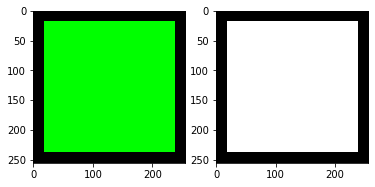

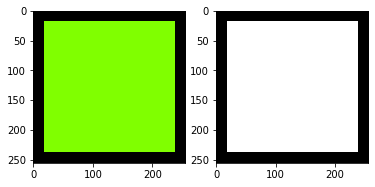

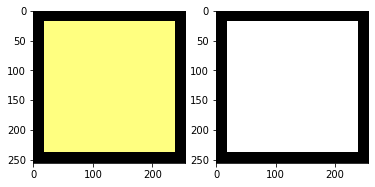

In [89]:
%matplotlib inline
from matplotlib import pyplot as plt

# Create a black image
image = torch.zeros(size=(3, 256, 256), dtype=torch.int)

# Leave the borders and make the rest of the image Green
image[1, 18:256 - 18, 18:256 - 18] = 255

# Create a mask of the same size
mask = torch.zeros(size=(256, 256), dtype=torch.bool)

# Assuming the green region in the original image is the Region of interest, change the mask to white for that area
mask[18:256 - 18, 18:256 - 18] = 1

# Create a view of the mask with the same dimensions as the original image
mask_expanded = mask.expand_as(image)
print(mask_expanded.shape)

mask_np = mask_expanded.numpy().transpose(1, 2, 0) * 255
image_np = image.numpy().transpose(1, 2, 0)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(image_np)
ax[1].imshow(mask_np)
plt.show()

image[0, mask] += 128
fig, ax = plt.subplots(1, 2)
ax[0].imshow(image_np)
ax[1].imshow(mask_np)
plt.show()

image[mask_expanded] += 128
image.clamp_(0, 255)
fig, ax = plt.subplots(1, 2)
ax[0].imshow(image_np)
ax[1].imshow(mask_np)
plt.show()

In the example above, one can also find a couple of useful tricks:


*   `clamp` method and function is a Pytorch's analogue of NumPy's `clip` function
*   many operations on tensors have in-place form, that does not return modified data, but change values in the tensor. The in-place version of the operation has trailing underscore according to Pytorch's naming convension - in the exmaple above it is `clamp_`
*   tensors have the same indexing as Numpy's arrays - one can use `:` seperated range, negative indexes and so on.


.


---

# Images and their representations

Now, let's discuss images, their representations and how different Python librarties work with them. 

Probably, the most well-known library for image loading and simple processing is [Pillow](https://pillow.readthedocs.io/en/stable/). 

However, many people in deep learning area stick with OpenCV for image loading and processing with some usage of another libraries when it is justified by performance/functionality. This is because OpenCV is in general much faster than the other libraries. Here you can find a couple of benchmarks: 

*   https://www.kaggle.com/zfturbo/benchmark-2019-speed-of-image-reading
*   https://github.com/albumentations-team/albumentations#benchmarking-results

To sum up the benchmarks above, there are two most common image formats, PNG and JPEGs. If your data is in PNG format - use OpenCV to read it. If it is in JPEG - use libturbojpeg. For image processing, use OpenCV if possible. _We will be using PIL a lot along with these._

As you will read the code from others, you may find out that some of them use Pillow/something else to read data. You should know, that color image representations in OpenCV and other libraries are different - OpenCV uses "BGR" channel order, while others use "RGB" one. 

To change "BRG" <-> "RGB" the only thing we need to do it to change channel order.

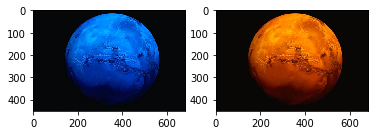

In [90]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2


bgr_image = cv2.imread('mars.jpg') 
# remember to add your own image in case you run this block, if you want to use the same image, 
# download it from: https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRCA40ftnscVzfV8ft8e7vIzQXfXeZdtco8nknJrfCUW6INI40U
rgb_image = bgr_image[..., ::-1]
fig, ax = plt.subplots(1, 2)
ax[0].imshow(bgr_image)
ax[1].imshow(rgb_image)
plt.show()

In [91]:
print(rgb_image[:,:,2])

[[5 5 5 ... 5 5 5]
 [5 5 5 ... 5 5 5]
 [5 5 5 ... 5 5 5]
 ...
 [5 5 5 ... 5 5 5]
 [3 4 4 ... 6 6 6]
 [3 4 4 ... 6 6 6]]




---

## Question 10:

Looking at the results above it can be said that the pixel values in the blue channels would be very small compared to red channel. True/False?


---




### Answer 10

Yes

# Autograd

Pytorch supports automatic differentiation. The module which implements this is called **AutoGrad**. It calculates the gradients and keeps track in forward and backward passes. For primitive tensors, you need to enable or disable it using the `required_grad` flag. But, for advanced tensors, it is enabled by default

In [92]:
a = torch.rand((3, 5), requires_grad = True)
print(a)
result = a * 5
print(result)

# grad can be implicitly created only for scalar outputs
# so let's calculate the sum here so that the output becomes a scalar and we can apply a backward pass
mean_result = result.sum()
print(mean_result)
# calculate gradient
mean_result.backward()
# print gradient of a
print(a.grad)

tensor([[0.5106, 0.5553, 0.0545, 0.1718, 0.0813],
        [0.8570, 0.4955, 0.2073, 0.1133, 0.0273],
        [0.0694, 0.7795, 0.2957, 0.5160, 0.6295]], requires_grad=True)
tensor([[2.5531, 2.7763, 0.2725, 0.8589, 0.4066],
        [4.2852, 2.4775, 1.0366, 0.5667, 0.1366],
        [0.3469, 3.8973, 1.4786, 2.5801, 3.1476]], grad_fn=<MulBackward0>)
tensor(26.8205, grad_fn=<SumBackward0>)
tensor([[5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.]])




---

## Question 11: 

Why the gradient of a is all 5s above?



---



### Answer 11

its first order derivating and all weights are multiplied by 5

As we see, Pytorch automagically calculated the gradient value for us. It looks to be the correct value - we multiplied an input by 5, so the gradient of this operation equals to 5.

# Disabling Autograd for tensors

We don't need to compute gradients for all the variables that are involved in the pipeline. The Pytorch API provides 2 ways to disable autograd.

`detach` - returns a copy of the tensor with autograd disabled. This 

1.   copy is built on the same memory as the original tensor, so in-place size / stride / storage changes (such as resize_ / resizeas / set / transpose) modifications are not allowed.
2.   torch.no_grad() - It is a context manager that allows you to guard a series of operations from autograd without creating new tensors.

In [93]:
a = torch.rand((3, 5), requires_grad=True)
detached_a = a.detach()
detached_result = detached_a * 5
result = a * 10
# we cannot do backward pass that is required for autograd using multideminsional output,
# so let's calculate the sum here
mean_result = result.sum()
mean_result.backward()
a.grad

tensor([[10., 10., 10., 10., 10.],
        [10., 10., 10., 10., 10.],
        [10., 10., 10., 10., 10.]])

In [94]:
a = torch.rand((3, 5), requires_grad=True)
with torch.no_grad():
    detached_result = a * 5
result = a * 10
# we cannot do backward pass that is required for autograd using multideminsional output,
# so let's calculate the sum here
mean_result = result.sum()
mean_result.backward()
a.grad

tensor([[10., 10., 10., 10., 10.],
        [10., 10., 10., 10., 10.],
        [10., 10., 10., 10., 10.]])

# Custom Network

A fully-connected ReLU network with one hidden layer and no biases, trained to predict y from x by minimizing squared Euclidean distance.

This implementation uses PyTorch tensors to manually compute the forward pass, loss, and backward pass.

A PyTorch Tensor is basically the same as a numpy array: it does not know anything about deep learning or computational graphs or gradients, and is just a generic n-dimensional array to be used for arbitrary numeric computation.

The biggest difference between a numpy array and a PyTorch Tensor is that a PyTorch Tensor can run on either CPU or GPU. To run operations on the GPU, just cast the Tensor to a cuda datatype.

In [95]:
dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random input and output data
x = torch.randn(N, D_in, device=device, dtype=dtype)
y = torch.randn(N, D_out, device=device, dtype=dtype)

# Randomly initialize weights
w1 = torch.randn(D_in, H, device=device, dtype=dtype)
w2 = torch.randn(H, D_out, device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(500):
    # Forward pass: compute predicted y
    h = x.mm(w1)
    h_relu = h.clamp(min=0)
    y_pred = h_relu.mm(w2)

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
#     print(t, loss)
    if t % 20 == 0:
        print(t, loss)

    # Backprop to compute gradients of w1 and w2 with respect to loss
    grad_y_pred = 2*(y_pred - y)
    grad_w2 = h_relu.t().mm(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h < 0] = 0
    grad_w1 = x.t().mm(grad_h)

    # Update weights using gradient descent
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 39532780.0
20 231924.015625
40 28216.890625
60 5885.07568359375
80 1622.0474853515625
100 514.865478515625
120 177.70782470703125
140 64.84036254882812
160 24.654796600341797
180 9.662209510803223
200 3.879192352294922
220 1.588875651359558
240 0.6620397567749023
260 0.27993687987327576
280 0.11994365602731705
300 0.05197920650243759
320 0.02285081148147583
340 0.010242938064038754
360 0.004744367208331823
380 0.002319259801879525
400 0.0012138928286731243
420 0.0006897380226291716
440 0.0004219833354000002
460 0.0002721465425565839
480 0.0001863017096184194


In [96]:
x

tensor([[-0.8268, -0.2485, -1.0746,  ...,  0.0253, -1.6024, -2.2317],
        [-0.3636, -1.3383,  0.4429,  ..., -1.0159, -0.7128, -2.0438],
        [ 0.1432,  1.4031, -0.8941,  ..., -0.5747, -0.6715, -0.7979],
        ...,
        [ 0.1176, -1.6958,  0.7854,  ..., -1.4605,  0.5716, -0.4368],
        [-0.6023, -0.4162, -0.0512,  ..., -1.3135, -0.4948, -0.8213],
        [-0.5280,  1.0142, -1.8237,  ...,  0.9854,  0.0402,  0.5359]])



---
## Question 12

In the code above, why do we have 2 in '2.0*(y_pred - y)`?

df/dx of f(x) = x**2 is 2*x

## Question 13
In the code above, what does `grad_h[h < 0] = 0` signify?

Derivative of ReLU


## Question 14
In the code above, how many "epochs" have we trained the model for? 

500

## Question 15
In the code above, if we take the trained model, and run it on fresh  inputs, the trained model will be able to predict fresh output with high accuracy. 

No, it would be different as we do not have random seed

## Question 16
In the code above, if we dont use clone in `grad_h = grad_h_relu.clone()` the model will still train without any issues. 

No 